In [12]:
from neuron import h, gui
from neuron.units import ms, mV
import matplotlib.pyplot as plt
import math
import numpy as np
h.load_file('stdrun.hoc')

1.0

In [13]:
# parameters from Lab 2 handout

ax1_diam = 10 #um
ax2_diam = 20 #um
ax1_l = 5 #mm
ax2_l = 5 #mm
nseg = 1000

Rm = 40000 #ohm*cm^2
Ra = 200 #ohm*cm

In [14]:
# Part 2-1

ax1_lambda = math.sqrt((ax1_diam*0.5*0.0001*Rm)/(2*Ra))
ax2_lambda = math.sqrt((ax2_diam*0.5*0.0001*Rm)/(2*Ra))
print(ax1_lambda, ax2_lambda)

0.22360679774997896 0.31622776601683794


In [15]:
print(h.units('diam'))
print(h.units('L'))
print(h.units('t'))
print(h.units('IClamp.amp'))
#print(h.units('ref_i_membrane'))

um
um
ms
nA


4.900000000000036 8.250000000000066 3.35000000000003 12.024999999999851 14.399999999999716 2.374999999999865
0.7462686567164113 1.0526315789474283


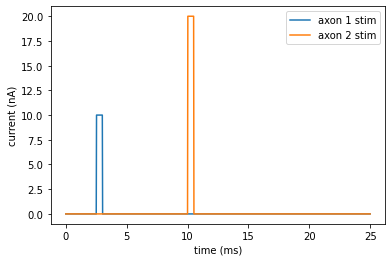

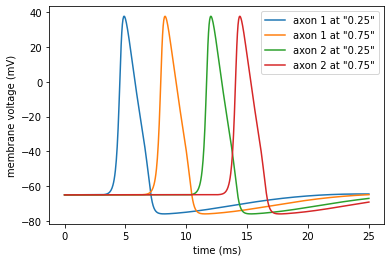

In [16]:
# Part 2-2 thru 2-5

ax1 = h.Section(name='ax1')
ax1.L = ax1_l*1000 # convert to um
ax1.diam = ax1_diam
ax1.Ra = Ra
ax1.nseg = nseg
ax1.insert('hh')

ax2 = h.Section(name='ax2')
ax2.L = ax2_l*1000 # convert to um
ax2.diam = ax2_diam
ax2.Ra = Ra
ax2.nseg = nseg
ax2.insert('hh')

i1 = h.IClamp(ax1(0))
i1.delay = 2.5
i1.dur = 0.5
i1.amp = 10 #nA

i2 = h.IClamp(ax2(0))
i2.delay = 10
i2.dur = 0.5
i2.amp = 20 #nA

t = h.Vector().record(h._ref_t)
i1_ = h.Vector().record(i1._ref_i)
i2_ = h.Vector().record(i2._ref_i)
v_ax1_1 = h.Vector().record(ax1(0.25)._ref_v)
v_ax1_2 = h.Vector().record(ax1(0.75)._ref_v)
v_ax2_1 = h.Vector().record(ax2(0.25)._ref_v)
v_ax2_2 = h.Vector().record(ax2(0.75)._ref_v)

h.finitialize(-65)
h.continuerun(25)

max_volt_i1 = np.argmax(v_ax1_1) #returns index
max_volt_i2 = np.argmax(v_ax1_2) #returns index
time1 = t[max_volt_i1] #ms
time2 = t[max_volt_i2] #ms
time_diff = time2 - time1
speed = (ax1_l/2)/(time_diff) # mm/ms = m/s

max_volt_i1_ = np.argmax(v_ax2_1) #returns index
max_volt_i2_ = np.argmax(v_ax2_2) #returns index
time1_ = t[max_volt_i1_] #ms
time2_ = t[max_volt_i2_] #ms
time_diff_ = time2_ - time1_
speed_ = (ax2_l/2)/(time_diff_) # mm/ms = m/s
print(time1, time2, time_diff, time1_, time2_, time_diff_)
print(speed, speed_)

plt.figure()
plt.plot(t, i1_, label='axon 1 stim')
plt.plot(t, i2_, label='axon 2 stim')
plt.xlabel('time (ms)')
plt.ylabel('current (nA)')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, v_ax1_1, label='axon 1 at "0.25"')
plt.plot(t, v_ax1_2, label='axon 1 at "0.75"')
plt.plot(t, v_ax2_1, label='axon 2 at "0.25"')
plt.plot(t, v_ax2_2, label='axon 2 at "0.75"')
plt.xlabel('time (ms)')
plt.ylabel('membrane voltage (mV)')
plt.legend()
plt.show()


In [17]:
# Part 3 variables - from Lab 2 handout
soma_L = 24 #um
soma_diam = 21 #um
soma_nseg = 100

dendrite_L = 50 #um
dendrite_diam = 12 #um
dendrite_nseg = 222

axon_unmy_L = 16 # um
axon_unmy_diam = 1 # um
axon_unmy_nseg = 100

axon_my_L = 300 # um
axon_my_diam = 1 # um
axon_my_nseg = 100

# hillock is tapered
# 1 - 3.5 - 6 - 8.5 - 11 - 13.5 - 16 - 18.5 - 21
axon_hillock_segments = 9
axon_hillock_length = 16 #um
axon_hillock_start_diameter = soma_diam #21um
axon_hillock_end_diameter = axon_unmy_diam # 1um
axon_hillock_step = (axon_hillock_start_diameter - axon_hillock_end_diameter)/(axon_hillock_segments-1)
axon_hillock_lengths = axon_hillock_length/axon_hillock_segments # um
axon_hillock_diameters = [] # um
for i in range(axon_hillock_segments):
    diam = axon_hillock_start_diameter - axon_hillock_step*i
    axon_hillock_diameters.append(diam)
#end
print(axon_hillock_diameters)

[21.0, 18.5, 16.0, 13.5, 11.0, 8.5, 6.0, 3.5, 1.0]


In [18]:
# Part 3
soma = h.Section(name='soma')
soma.L = soma_L
soma.diam = soma_diam
soma.nseg = soma_nseg
soma.insert('pas')
soma.insert('extracellular')
soma.insert('hh')

dendrite = h.Section(name='dendrite')
dendrite.L = dendrite_L
dendrite.diam = dendrite_diam
dendrite.nseg = dendrite_nseg
dendrite.insert('pas')
dendrite.insert('extracellular')
dendrite.insert('hh')

axon_unmy = h.Section(name='axon_unmy')
axon_unmy.L = axon_unmy_L
axon_unmy.diam = axon_unmy_diam
axon_unmy.nseg = axon_unmy_nseg
axon_unmy.insert('pas')
axon_unmy.insert('extracellular')
axon_unmy.insert('hh')
for seg in axon_unmy:
    #be sure values are at default
    #gnabar default = 0.12
    #kbar default = 0.036
    seg.hh.gnabar = 0.12
    seg.hh.gkbar = 0.036

axon_my = h.Section(name='axon_my')
axon_my.L = axon_my_L
axon_my.diam = axon_my_diam
axon_unmy.cm = 0.04
axon_my.nseg = axon_my_nseg
axon_my.insert('pas')
axon_my.insert('extracellular')

axon_hillock = []
for i in range(axon_hillock_segments):
    n = "axon_hillock" + str(i)
    section = h.Section(name=n)
    section.L = axon_hillock_lengths
    section.diam = axon_hillock_diameters[i]
    section.insert('pas')
    section.insert('extracellular')
    section.insert('hh')
    axon_hillock.append(section)
    #attach if applicable
    if i > 0:
        axon_hillock[i].connect(axon_hillock[i-1])
#end

# connect everything - are we supposed to do this?
# dendrite --- soma --- axon hillock --- nonmy axon -- my axon
axon_my.connect(axon_unmy)
axon_unmy.connect(axon_hillock[axon_hillock_segments-1])
axon_hillock[0].connect(soma)
soma.connect(dendrite)

#h.topology()

soma

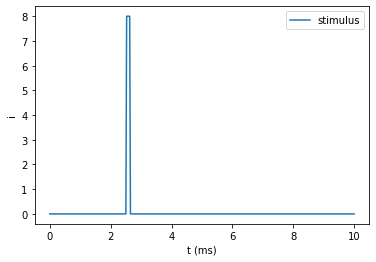

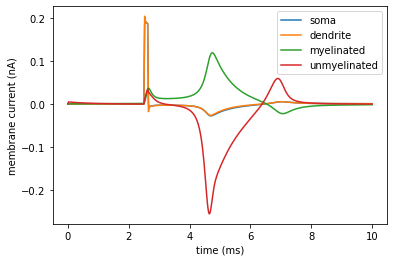

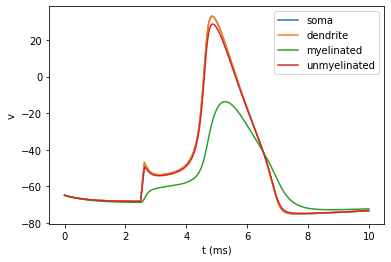

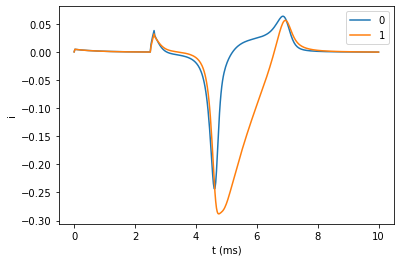

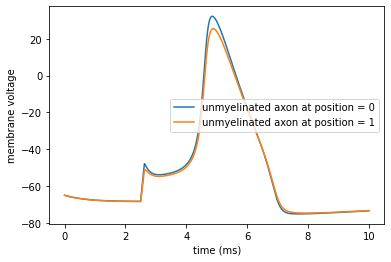

4.850000000000035 4.8750000000000355 0.025000000000000355 0.6399999999999909


In [19]:
def create_stim(sec, pos, delay, dur, amp):
    i = h.IClamp(pos, sec=sec)
    i.delay = delay
    i.dur = dur
    i.amp = amp
    return i
#end

stim1 = create_stim(dendrite, 0, 2.5, 0.125, 8)

t = h.Vector().record(h._ref_t)

i_stim = h.Vector().record(stim1._ref_i)
i_soma = h.Vector().record(soma(0.5)._ref_i_membrane)
i_dendrite = h.Vector().record(dendrite(0.5)._ref_i_membrane)
i_axon_my = h.Vector().record(axon_my(0.5)._ref_i_membrane)
i_axon_unmy = h.Vector().record(axon_unmy(0.5)._ref_i_membrane)

v_soma = h.Vector().record(soma(0.5)._ref_v)
v_dendrite = h.Vector().record(dendrite(0.5)._ref_v)
v_axon_my = h.Vector().record(axon_my(0.5)._ref_v)
v_axon_unmy = h.Vector().record(axon_unmy(0.5)._ref_v)

# record at 2 different nonmy axon sections
i_axon_unmy_0 = h.Vector().record(axon_unmy(0)._ref_i_membrane)
i_axon_unmy_1 = h.Vector().record(axon_unmy(1)._ref_i_membrane)

v_axon_unmy_0 = h.Vector().record(axon_unmy(0)._ref_v)
v_axon_unmy_1 = h.Vector().record(axon_unmy(1)._ref_v)

i_axon_my_025 = h.Vector().record(axon_unmy(0.25)._ref_i_membrane)
i_axon_my_075 = h.Vector().record(axon_unmy(0.75)._ref_i_membrane)

v_axon_my_025 = h.Vector().record(axon_my(0.25)._ref_v)
v_axon_my_075 = h.Vector().record(axon_my(0.75)._ref_v)

h.finitialize(-65)
h.continuerun(10)

plt.figure()
plt.plot(t, i_stim, label='stimulus')
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, i_soma, label='soma')
plt.plot(t, i_dendrite, label='dendrite')
plt.plot(t, i_axon_my, label='myelinated')
plt.plot(t, i_axon_unmy, label='unmyelinated')
plt.xlabel('time (ms)')
plt.ylabel('membrane current (nA)')
plt.legend()
plt.savefig('../figures/lessIonDens')
plt.show()

plt.figure()
plt.plot(t, v_soma, label='soma')
plt.plot(t, v_dendrite, label='dendrite')
plt.plot(t, v_axon_my, label='myelinated')
plt.plot(t, v_axon_unmy, label='unmyelinated')
plt.xlabel('t (ms)')
plt.ylabel('v')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, i_axon_unmy_0, label='0')
plt.plot(t, i_axon_unmy_1, label='1')
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, v_axon_unmy_0, label='unmyelinated axon at position = 0')
plt.plot(t, v_axon_unmy_1, label='unmyelinated axon at position = 1')
plt.xlabel('time (ms)')
plt.ylabel('membrane voltage')
plt.legend()
plt.savefig('../figures/lessIonDensVolt')
plt.show()

max_volt_i1 = np.argmax(v_axon_unmy_0) #returns index
max_volt_i2 = np.argmax(v_axon_unmy_1) #returns index
time1 = t[max_volt_i1] #ms
time2 = t[max_volt_i2] #ms
time_diff = time2 - time1
speed = (axon_unmy.L/1000)/(time_diff) #convert um to mm
print(time1, time2, time_diff, speed)

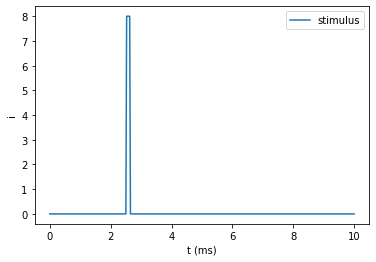

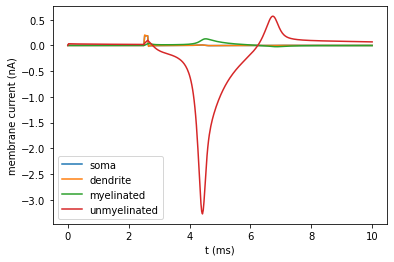

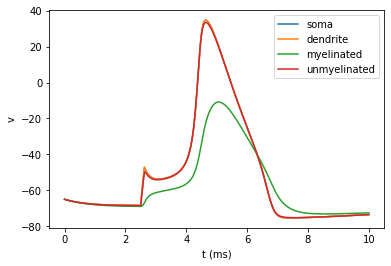

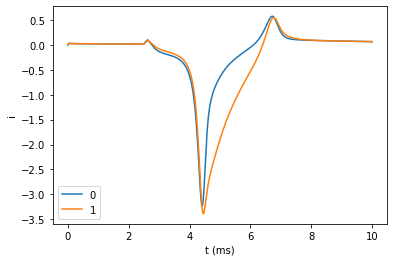

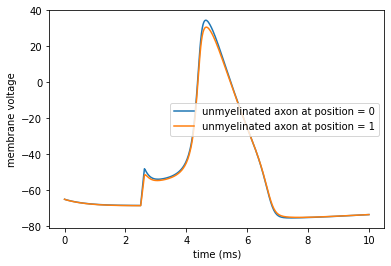

In [20]:
# Part 3-5, 3-6: Increase ion channel density
for seg in axon_unmy:
    # x10
    seg.hh.gnabar = 1.2
    seg.hh.gkbar = 0.36

h.finitialize(-65)
h.continuerun(10)

plt.figure()
plt.plot(t, i_stim, label='stimulus')
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, i_soma, label='soma')
plt.plot(t, i_dendrite, label='dendrite')
plt.plot(t, i_axon_my, label='myelinated')
plt.plot(t, i_axon_unmy, label='unmyelinated')
plt.xlabel('t (ms)')
plt.ylabel('membrane current (nA)')
plt.legend()
plt.savefig('../figures/moreIonDens')
plt.show()

plt.figure()
plt.plot(t, v_soma, label='soma')
plt.plot(t, v_dendrite, label='dendrite')
plt.plot(t, v_axon_my, label='myelinated')
plt.plot(t, v_axon_unmy, label='unmyelinated')
plt.xlabel('t (ms)')
plt.ylabel('v')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, i_axon_unmy_0, label='0')
plt.plot(t, i_axon_unmy_1, label='1')
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, v_axon_unmy_0, label='unmyelinated axon at position = 0')
plt.plot(t, v_axon_unmy_1, label='unmyelinated axon at position = 1')
plt.xlabel('time (ms)')
plt.ylabel('membrane voltage')
plt.legend()
plt.savefig('../figures/moreIonDensVolt')
plt.show()

#max_volt_i1 = np.argmax(v_axon_unmy_0) #returns index
#max_volt_i2 = np.argmax(v_axon_unmy_1) #returns index
#time1 = t[max_volt_i1] #ms
#time2 = t[max_volt_i2] #ms
#time_diff = time2 - time1
#speed = (axon_unmy.L/1000)/(time_diff) #convert um to mm
#print(time1, time2, time_diff, speed)

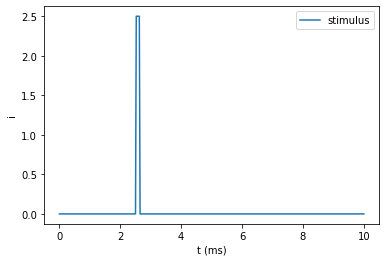

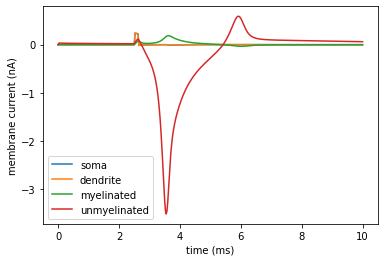

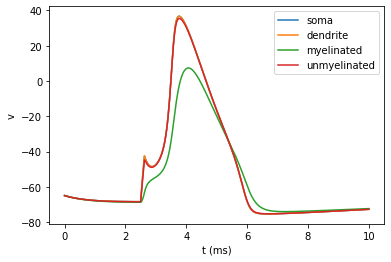

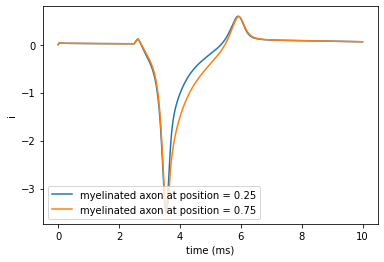

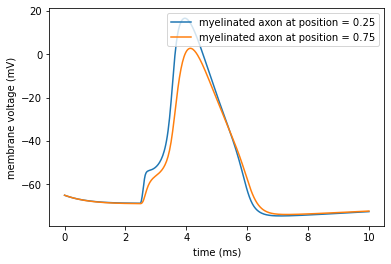

3.9500000000000224 4.125000000000025 0.1750000000000025 0.42857142857142244


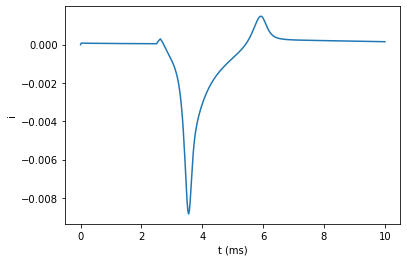

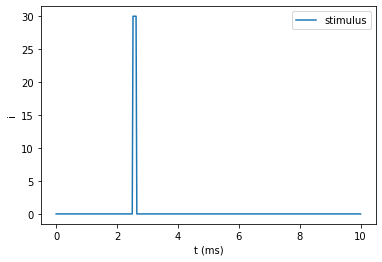

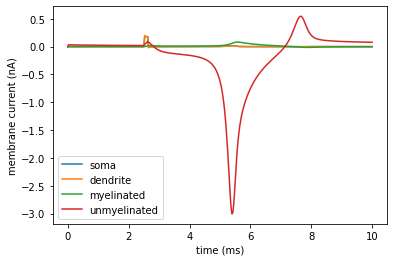

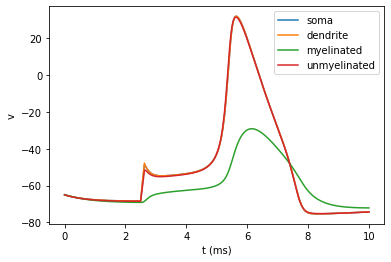

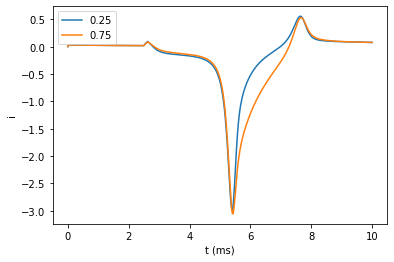

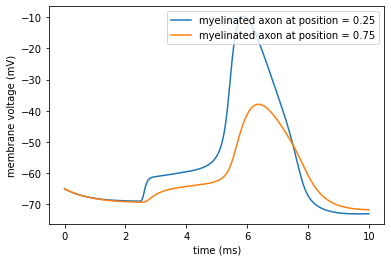

5.87500000000005 6.375000000000057 0.5000000000000071 0.5999999999999914


In [21]:
# Part 3-7

def scale_stuff(scale):
    soma.L = soma_L*scale
    soma.diam = soma_diam*scale
    #print(soma.diam)

    dendrite.L = dendrite_L*scale
    dendrite.diam = dendrite_diam*scale
    #print(dendrite.diam)

    axon_unmy.L = axon_unmy_L*scale
    axon_unmy.diam = axon_unmy_diam*scale
    #print(axon_unmy.diam)

    axon_my.L = axon_my_L*scale
    axon_my.diam = axon_my_diam*scale
    #print(axon_my.diam)

    for i, seg in enumerate(axon_hillock):
        seg.L = axon_hillock_lengths*scale
        seg.diam = axon_hillock_diameters[i]*scale
        #print(seg.diam)
    #end
#end

# Scale 0.5
scale_stuff(0.5)
stim1.amp = 2.5

h.finitialize(-65)
h.continuerun(10)

plt.figure()
plt.plot(t, i_stim, label='stimulus')
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, i_soma, label='soma')
plt.plot(t, i_dendrite, label='dendrite')
plt.plot(t, i_axon_my, label='myelinated')
plt.plot(t, i_axon_unmy, label='unmyelinated')
plt.xlabel('time (ms)')
plt.ylabel('membrane current (nA)')
plt.legend()
plt.savefig('../figures/halfDimCurrents')
plt.show()

plt.figure()
plt.plot(t, v_soma, label='soma')
plt.plot(t, v_dendrite, label='dendrite')
plt.plot(t, v_axon_my, label='myelinated')
plt.plot(t, v_axon_unmy, label='unmyelinated')
plt.xlabel('t (ms)')
plt.ylabel('v')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, i_axon_my_025, label='myelinated axon at position = 0.25')
plt.plot(t, i_axon_my_075, label='myelinated axon at position = 0.75')
plt.xlabel('time (ms)')
plt.ylabel('i')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, v_axon_my_025, label='myelinated axon at position = 0.25')
plt.plot(t, v_axon_my_075, label='myelinated axon at position = 0.75')
plt.xlabel('time (ms)')
plt.ylabel('membrane voltage (mV)')
plt.legend()
plt.savefig('../figures/halfDimVoltage')
plt.show()

max_volt_i1 = np.argmax(v_axon_my_025) #returns index
max_volt_i2 = np.argmax(v_axon_my_075) #returns index
time1 = t[max_volt_i1] #ms
time2 = t[max_volt_i2] #ms
time_diff = time2 - time1
speed = (axon_my.L/1000/2)/(time_diff) #convert um to mm
print(time1, time2, time_diff, speed)

abs_i_axon_unmy = i_axon_unmy*axon_unmy.L*0.0001*math.pi*axon_unmy.diam**0.0001 #mA
plt.figure()
plt.plot(t, abs_i_axon_unmy)
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.show()

# Scale 2
scale_stuff(2)
stim1.amp = 30

h.finitialize(-65)
h.continuerun(10)

plt.figure()
plt.plot(t, i_stim, label='stimulus')
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, i_soma, label='soma')
plt.plot(t, i_dendrite, label='dendrite')
plt.plot(t, i_axon_my, label='myelinated')
plt.plot(t, i_axon_unmy, label='unmyelinated')
plt.xlabel('time (ms)')
plt.ylabel('membrane current (nA)')
plt.legend()
plt.savefig('../figures/doubleDimCurrents')
plt.show()

plt.figure()
plt.plot(t, v_soma, label='soma')
plt.plot(t, v_dendrite, label='dendrite')
plt.plot(t, v_axon_my, label='myelinated')
plt.plot(t, v_axon_unmy, label='unmyelinated')
plt.xlabel('t (ms)')
plt.ylabel('v')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, i_axon_my_025, label='0.25')
plt.plot(t, i_axon_my_075, label='0.75')
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, v_axon_my_025, label='myelinated axon at position = 0.25')
plt.plot(t, v_axon_my_075, label='myelinated axon at position = 0.75')
plt.xlabel('time (ms)')
plt.ylabel('membrane voltage (mV)')
plt.legend()
plt.savefig('../figures/doubleDimVoltage')
plt.show()

max_volt_i1 = np.argmax(v_axon_my_025) #returns index
max_volt_i2 = np.argmax(v_axon_my_075) #returns index
time1 = t[max_volt_i1] #ms
time2 = t[max_volt_i2] #ms
time_diff = time2 - time1
speed = (axon_my.L/1000/2)/(time_diff) # mm/ms = m/s #convert um to mm
print(time1, time2, time_diff, speed)

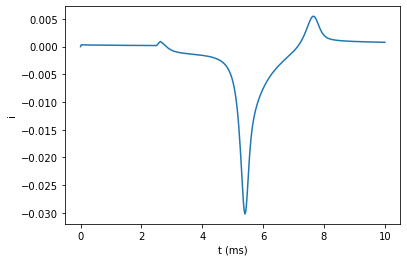

In [22]:
# Part 3-8
# Area = L*2*pi*r = L*pi*d

abs_i_axon_unmy = i_axon_unmy*axon_unmy.L*0.0001*math.pi*axon_unmy.diam**0.0001 #mA
plt.figure()
plt.plot(t, abs_i_axon_unmy)
plt.xlabel('t (ms)')
plt.ylabel('i')
plt.show()

In [23]:
# Part 4
# Used pulse trains for 417